<a href="https://colab.research.google.com/github/akhiluthappa1/deeplearning/blob/main/Comparing_Distirbutions_using_KL_divergence%2C_JS_Divergence%2C_and_Kolmogorov_Smirnov_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1

### (1) Prepare two images that are fairly similar.

#### I have taken images of 2 dogs which are very similar yet different, a golden retriever and a labrador. 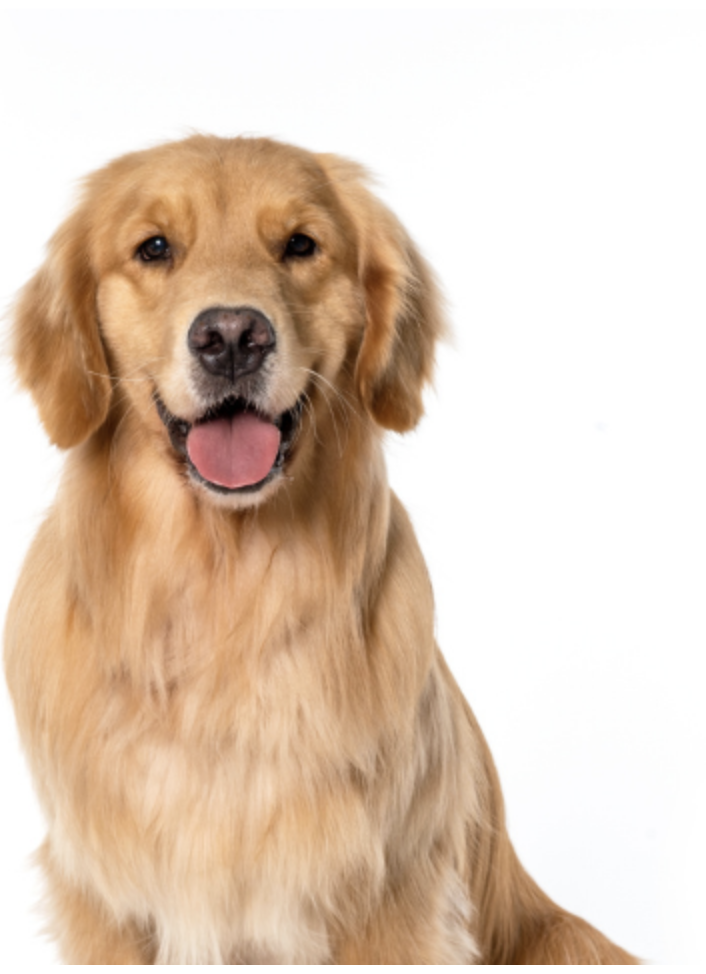

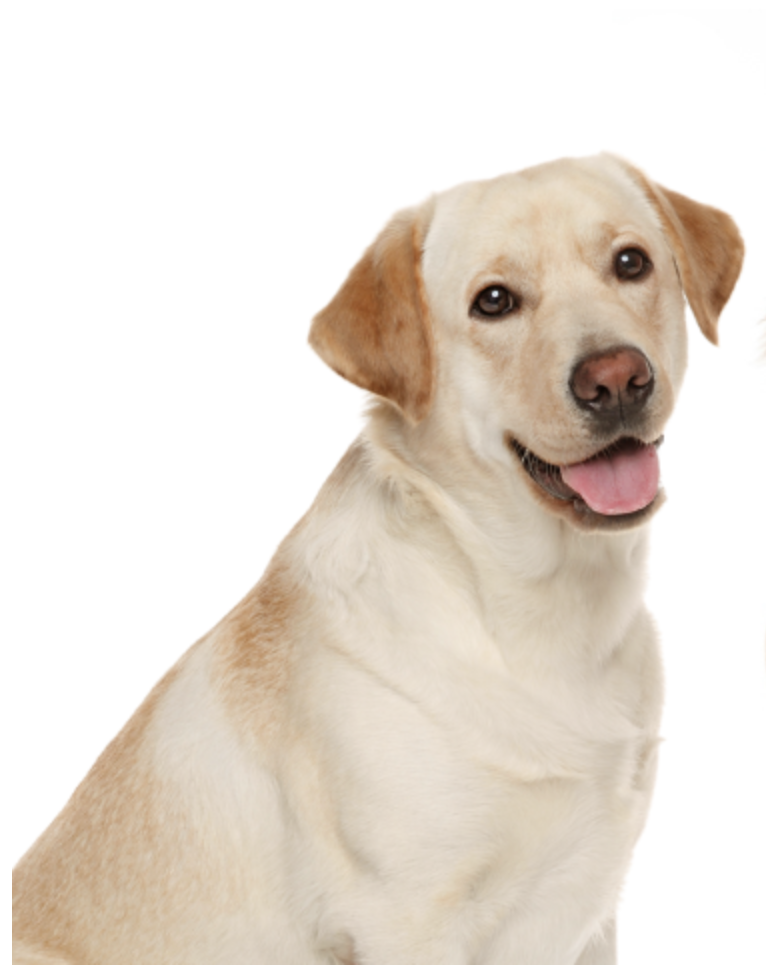

### (2) Draw a histogram of each image in the previous task is somehow the distribution of the image. Plot the histogram of each image.

####

*   Image is read using opencv package
*   Compute the histogram of the image
*   Plot using MatplotLib






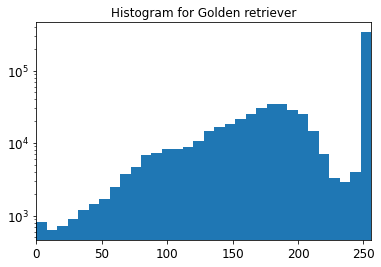

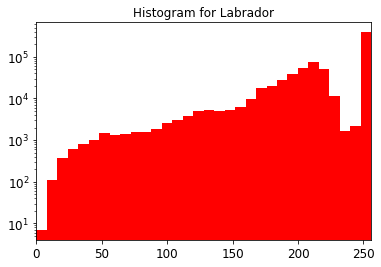

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image into a grayscale image
img = cv2.imread('/content/golden.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/labrador.png', cv2.IMREAD_GRAYSCALE)
img
# Compute the histogram of the image
hist = cv2.calcHist([img], [0], None, [32], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [32], [0, 256])

# Plot the histogram using Matplotlib
plt.hist(img.ravel(), bins=32, range=[0, 256], log=True)
plt.xlim([0, 256])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram for Golden retriever")
plt.show()

plt.hist(img2.ravel(), bins=32, range=[0, 256], log=True, color='red')
plt.xlim([0, 256])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram for Labrador")
plt.show()

### (3) Compare the distributions between both images with KolmogorovSmirnov, KL-Divergence, and JS-Divergence.

####1. KolmogorovSmirnov comparison

In [ ]:
from scipy.stats import ks_2samp

# Flatten the images into 1D arrays
img_flat = img.ravel()
img2_flat = img2.ravel()

# Compute the p-value using the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(img_flat, img2_flat)

# Check if the p-value is less than a significance level
print("p-value- ", str(p_value))
if p_value < 0.05:
    print("The distributions of the two images are significantly different.")
else:
    print("The distributions of the two images are not significantly different.")


p-value-  0.0
The distributions of the two images are significantly different.


#### 2. KL-Divergence comparison-  The KL divergence returns a scalar value representing the difference between the two distributions. If the KL divergence is close to zero, the two distributions are extremely similar. A large KL divergence indicates that the two distributions are very different.
To compare two images using KL divergence, one would first convert the images into 1D arrays of intensity values (or other features of interest), then calculate the probability distributions for each image. Next, the KL divergence between the two distributions can be calculated as the sum of the element-wise logarithmic ratios between the probabilities in one distribution and the probabilities in the other.

In [ ]:
import numpy as np
#straight forward method.
kl_divergence = np.sum(np.where(hist != 0, hist * np.log(hist / hist2), 0))

# Print the KL divergence
print("KL divergence: ", kl_divergence)

KL divergence:  112625.25


### 3. JS Divergence comparison- The Jensen-Shannon Divergence is calculated between two random images using the js divergence function, which implements the JS-Divergence formula. After flattening the images into 1D arrays, the probability distributions are calculated by normalizing the intensity values. The JS-Divergence is then calculated by invoking the js divergence function with the two probability distributions passed in. The entropy is calculated using the entropy function from the scipy.stats library.

In [ ]:
import numpy as np
from scipy.stats import entropy


# Flatten the image arrays into 1D arrays
img_flat_resized = np.resize(img_flat, img2_flat.shape)
flat_image1 = img_flat_resized
flat_image2 = img2_flat

# Calculate the probability distributions of each image by normalizing the intensity values
p = flat_image1 / np.sum(flat_image1)
q = flat_image2 / np.sum(flat_image2)

# Calculate the Jensen-Shannon Divergence between the two images
m = (p+q)/2
js_div = (entropy(p, m) + entropy(q, m)) / 2
print("Jensen-Shannon Divergence:", js_div)

Jensen-Shannon Divergence: 0.014008624296903529


###************************************************************

## TASK 2
####FOR TASK 2, I used 2 implementations. 1 from the kaggle implementation and another the sklearn implementation. FOr the latter, I even tweaked the gaussian_mixture package code to add a visuaization of which I shall add a screenshot.

#### (1) Create a random dataset in 3D space that has three clusters.

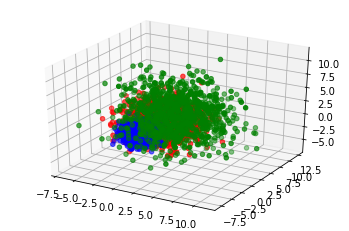

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define the number of samples for each cluster
n_samples = 1000
random_seed=36745765
np.random.seed(random_seed)

# Generate random data for each cluster
cluster1 = np.random.normal(loc=[1, 1, 1], scale=2, size=(n_samples, 3))
print
cluster2 = np.random.normal(loc=[-1, -1, -1], scale=1, size=(n_samples, 3))
cluster3 = np.random.normal(loc=[2, 2, 2], scale=3, size=(n_samples, 3))

# Combine the data from all clusters into a single array
data = np.concatenate((cluster1, cluster2, cluster3), axis=0)
colors = ['red'] * n_samples + ['blue'] * n_samples + ['green'] * n_samples

# Plot the 3D dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=colors)
plt.show()

#### (2) By using Expectation Maximization algorithms, try to implement Gaussian Mixture Modeling (GMM) clustering algorithm and cluster these data correctly.
####(3) You should visualize at least two E and M steps in between.

- I use the kaggle/ lecture implementation of the same.
- I of course tweak parts of it since its a 3D implementation and not a 2D Implementation
- In the following code block, I make the necessary imports.
- I combine all the clusters to a single variable.
- Then I plot a histogram.

<class 'numpy.ndarray'>


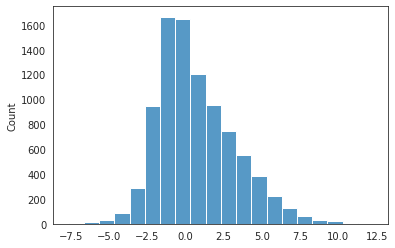

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform

random_seed=36745765
np.random.seed(random_seed)

print(type(cluster1))
# np.array(X_train)[indices.astype(int)]
data=np.append(cluster1, cluster2)
data = np.append(data, cluster3)
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) # to plot the data
sns.histplot(data, bins=20, kde=False);


- The Gaussian class and Gaussina mixture class is defined here.

In [ ]:
class Gaussian:
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end

        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))

        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a probability"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        wp1_list = []
        wp2_list = []
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #freshening up self.loglike in the process
            # yield weight tuple
            wp1_list.append(wp1)
            wp2_list.append(wp2)
            yield (wp1, wp2)
        # fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        # ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=wp1_list, cmap='Reds')
        # plt.show()

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den

        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)


    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one,
                                                              self.two,
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one,
                                                        self.two,
                                                        self.mix)

#### Now we test it and see it action as well as plot the mixture

In [ ]:
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix

    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        print("one less")
        pass

 1 Mixture: Gaussian(6.80024, 1.31624), Gaussian(0.346759, 2.11592), mix=0.0509)
 1 Mixture: Gaussian(6.54715, 1.53699), Gaussian(0.356808, 2.14345), mix=0.0514)
 1 Mixture: Gaussian(6.3484, 1.63654), Gaussian(0.343512, 2.13823), mix=0.0552)
 1 Mixture: Gaussian(6.18454, 1.69033), Gaussian(0.323359, 2.12366), mix=0.06)
 1 Mixture: Gaussian(6.04218, 1.72372), Gaussian(0.300576, 2.1057), mix=0.0652)
 1 Mixture: Gaussian(5.91429, 1.74721), Gaussian(0.276752, 2.08651), mix=0.0707)
 1 Mixture: Gaussian(5.79709, 1.76557), Gaussian(0.252612, 2.06705), mix=0.0762)
 1 Mixture: Gaussian(5.68839, 1.78114), Gaussian(0.228529, 2.04777), mix=0.0818)
 1 Mixture: Gaussian(5.5868, 1.7951), Gaussian(0.204713, 2.02889), mix=0.0874)
 1 Mixture: Gaussian(5.49136, 1.80807), Gaussian(0.181286, 2.01052), mix=0.093)
 1 Mixture: Gaussian(5.40136, 1.82041), Gaussian(0.158326, 1.99274), mix=0.0986)
 1 Mixture: Gaussian(5.31624, 1.83232), Gaussian(0.13588, 1.97556), mix=0.104)
 1 Mixture: Gaussian(5.23553, 1.8439)

Computing best model with random restarts...

Gaussian 1: μ = -0.82, σ = 1.1, weight = 0.41
Gaussian 2: μ = 1.7, σ = 2.7, weight = 0.59


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


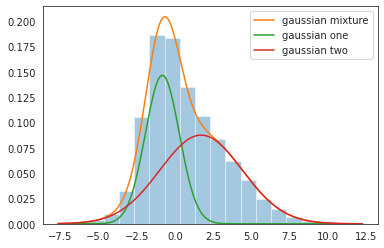

In [ ]:
n_iterations = 50
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#print('Best Gaussian Mixture : μ = {:.2}, σ = {:.2} with μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))
Mean1 = 1
Mean2 = -1
Mean3 = 2
Standard_dev1 = 2
Standard_dev2 = 1
Standard_dev3 = 3
# print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
# print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
# print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("3", Mean3, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))
#Show mixture
sns.distplot(data, bins=20, kde=False, norm_hist=True);
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend();

## The other implementation using sklearn.

- Create a visualisation function to plot it in 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os

def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input:
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()


def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input:
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

#### Use Gaussian Mixture in sklearn. I tweak the implementation code i.e  to add a visualisation for the steps. file location- /usr/local/lib/python3.8/dist-packages/sklearn/mixture/_gaussian_mixture.py

Here is a screenshot-
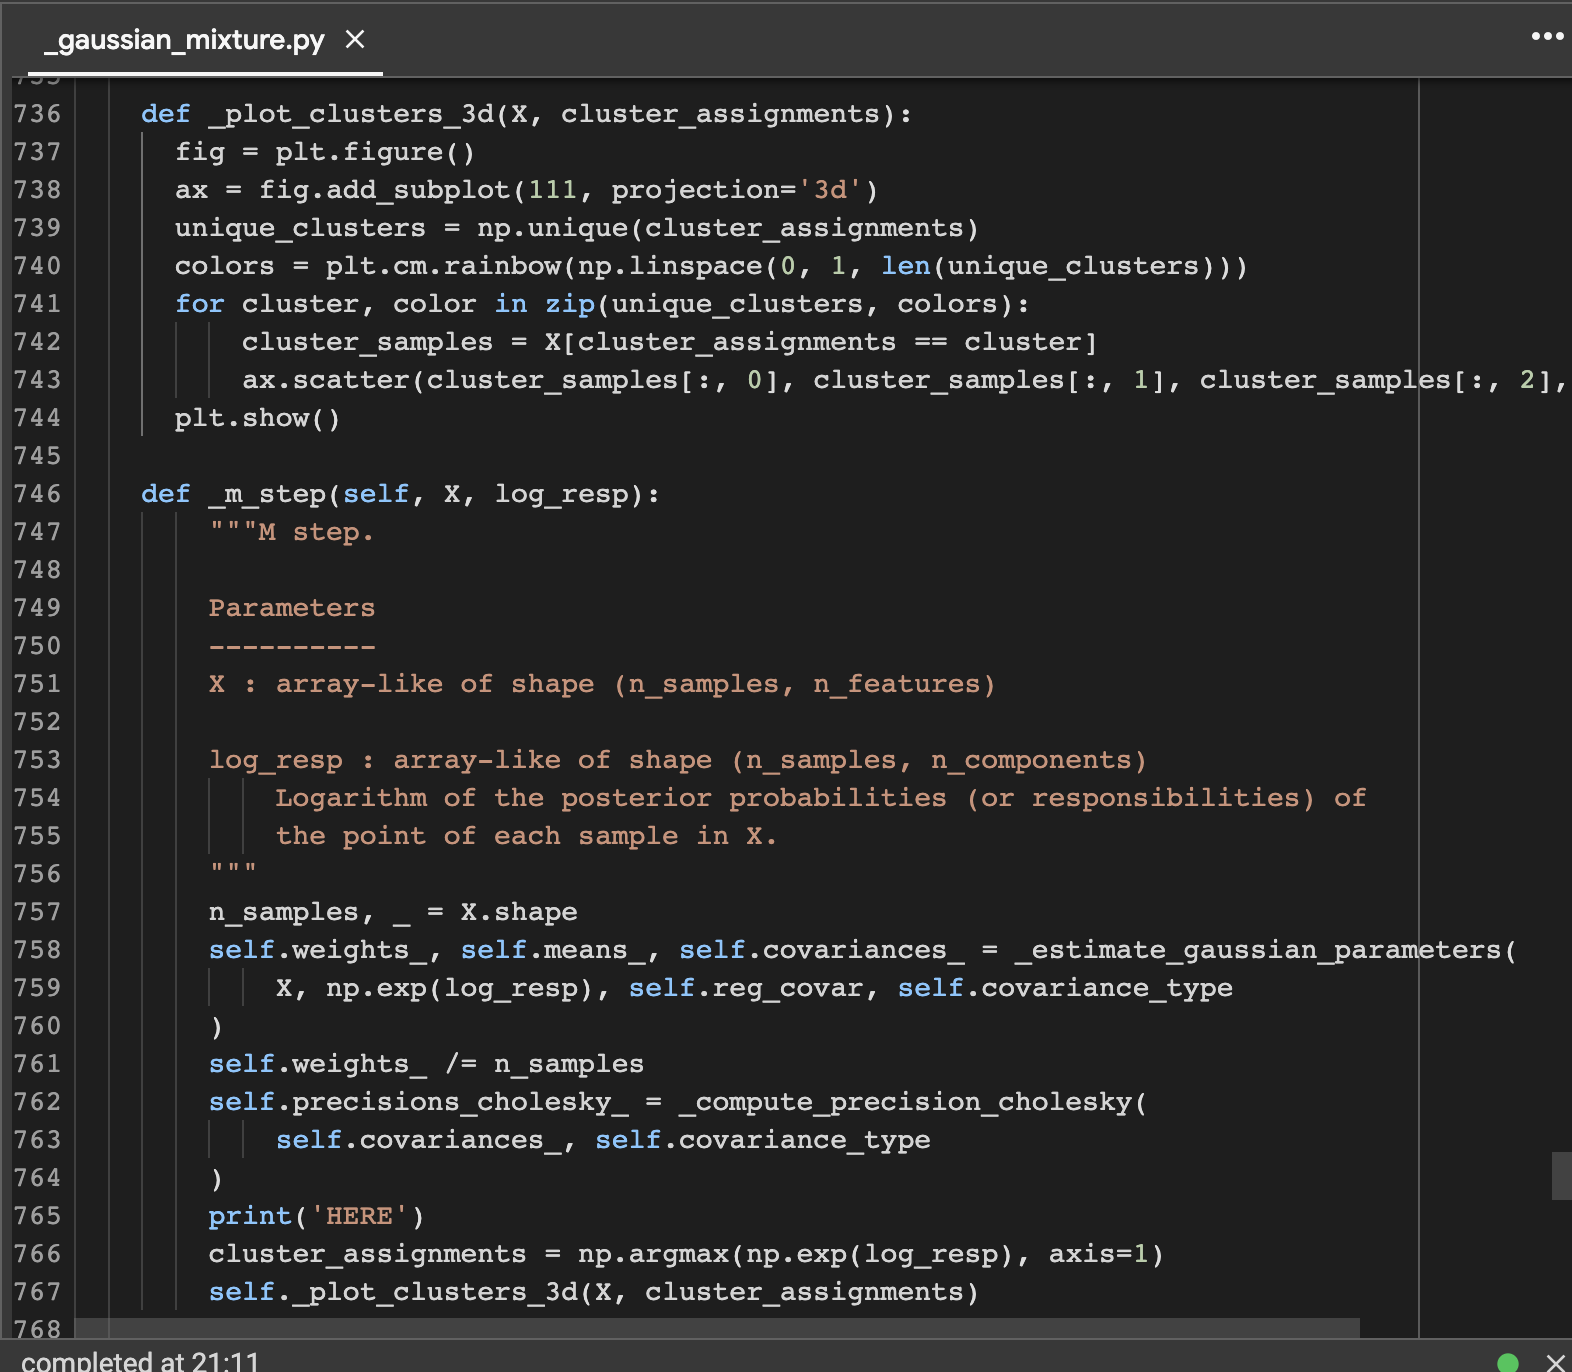

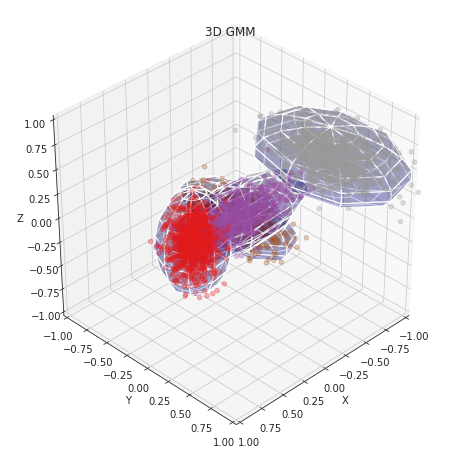

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

## Generate synthetic data
N,D = 1000, 3 # number of points and dimenstinality

# set gaussian ceters and covariances in 3D
means = np.array([[0.5, 0.0, 0.0],
                  [0.0, 0.0, 0.0],
                  [-0.5, -0.5, -0.5],
                  [-0.8, 0.3, 0.4]])
covs = np.array([np.diag([0.01, 0.01, 0.03]),
                  np.diag([0.08, 0.01, 0.01]),
                  np.diag([0.01, 0.05, 0.01]),
                  np.diag([0.03, 0.07, 0.01])])
n_gaussians = means.shape[0]

points = []
for i in range(len(means)):
    x = np.random.multivariate_normal(means[i], covs[i], N )
    points.append(x)
points = np.concatenate(points)

#fit the gaussian model
gmm = GaussianMixture(n_components=n_gaussians, covariance_type='diag')
gmm.fit(points)

#visualize
visualize_3d_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)

In the image above you can see the generated 3D points and a semi-transparent surface representing the Gaussian location and scale ( 3 standard deviations in each axis).